# HOGDescriptor

https://docs.opencv.org/2.4/modules/gpu/doc/object_detection.html

In [1]:
import cv2
import numpy as np
print(cv2.__version__)

4.5.3


## Загружаем исходные данные

In [2]:
train = np.loadtxt('data/digit/train.csv', delimiter=',', skiprows=1)
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))

## Задаем параметры для вычисления дескриптора

In [3]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

## Вычисляем дескриптор для изображения

In [4]:
descriptor = hog.compute(np.uint8(train_img[0]))
print('Descriptor size: %d' % len(descriptor))

Descriptor size: 144


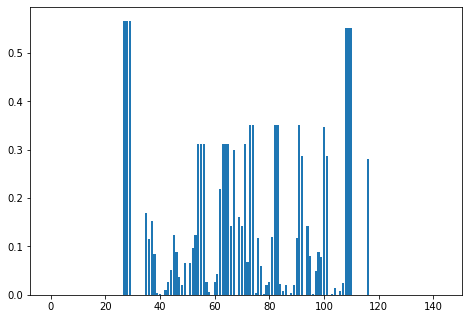

In [6]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(descriptor)), descriptor.reshape(-1))
plt.show()